In [1]:
import matplotlib.pyplot as plt
import numpy as np

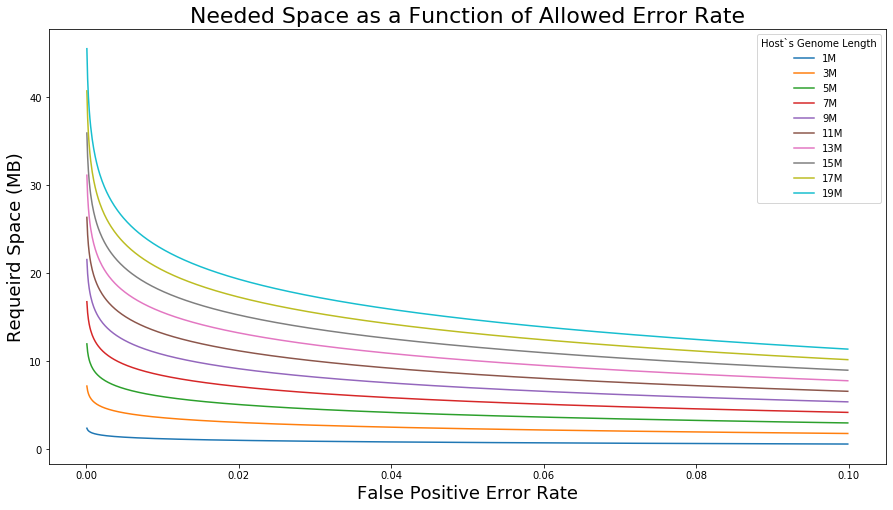

In [2]:
plt.figure(figsize=(15,8))
X = np.arange(0.0001, 0.1, 0.0001)

for x in range(1,21, 2):
    plt.plot(X, -(x*1_000_000 * np.log(X))/np.power(np.log(2),2) / 8e+6, label=f"{x}M")
    
plt.title("Needed Space as a Function of Allowed Error Rate", fontsize=22)     
plt.ylabel('Requeird Space (MB)', fontsize=18)
plt.xlabel('False Positive Error Rate', fontsize=18)
plt.legend(title="Host`s Genome Length");

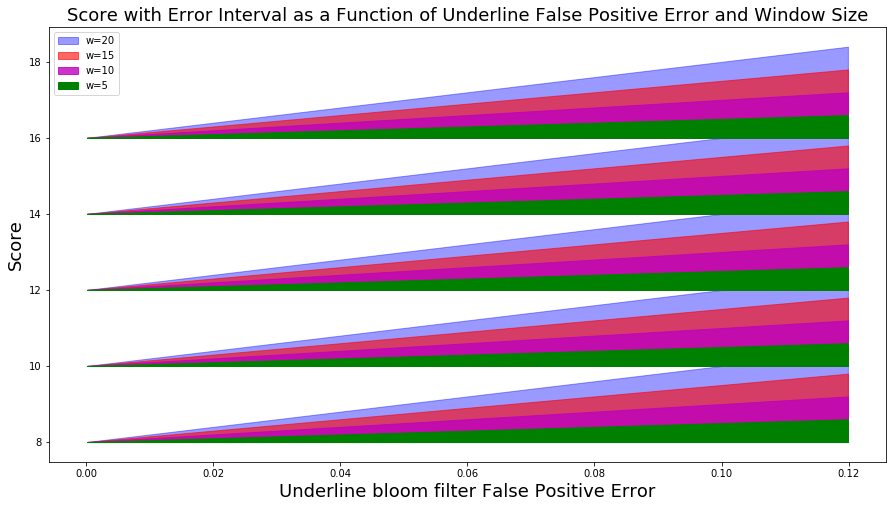

In [3]:
plt.figure(figsize=(15,8))
min_error = 0.0001
max_error = 0.12

X = np.arange(min_error, max_error, 0.0001)
Y = np.ones(X.shape[0])

X_ = [min_error, max_error]
Y_ = np.array([1,1])

for i in range(8, 18, 2):
    plt.fill_between(X, i*Y, i*Y + X * 20, color='b', alpha=.4)
    w20 = plt.fill(np.NaN, np.NaN, color='b', alpha=.4)
    
    plt.fill_between(X, i*Y, i*Y + X * 15, color='r',alpha=.6)
    w15 = plt.fill(np.NaN, np.NaN, color='r',alpha=.6)

    plt.fill_between(X, i*Y, i*Y + X * 10, color='m',alpha=.8)
    w10 = plt.fill(np.NaN, np.NaN, color='m',alpha=.8)

    plt.fill_between(X, i*Y, i*Y + X * 5, color='g',alpha=1)
    w5 = plt.fill(np.NaN, np.NaN, color='g',alpha=1)

plt.title("Score with Error Interval as a Function of Underline False Positive Error and Window Size", fontsize=18)     
plt.xlabel('Underline bloom filter False Positive Error', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.legend([w20[0], w15[0], w10[0], w5[0]], ['w=20', 'w=15', 'w=10', 'w=5'], loc='upper left')
plt.show()

In [4]:
import json
import pandas as pd
with open("results.json", "r") as f:
    results = json.load(f)

In [5]:
score_ecoli = ("ecoli", 0, sum(results["Ecoli"]["naive_hits"]) / results["target"]["length"], tuple(results["Ecoli"]["naive_hits"]))
r_ecoli = sorted(list(set([score_ecoli] + [("ecoli", x[0], x[1], tuple(x[2])) for x in results["Ecoli"]["estimation_details"]])))

In [6]:
score_scer = ("scer", 0, sum(results["Scer"]["naive_hits"]) / results["target"]["length"], tuple(results["Scer"]["naive_hits"]))
r_sceri = sorted(list(set([score_scer] + [("scer", x[0], x[1], tuple(x[2])) for x in results["Scer"]["estimation_details"]])))

In [7]:
df = pd.DataFrame(r_ecoli + r_sceri)
df.columns = ["name", "error_rate", "score", "hits"]
df["target_lentgh"] = results["target"]["length"]
df.loc[df["name"] == "ecoli", "host_length"] = results["Ecoli"]["length"]
df.loc[df["name"] == "scer", "host_length"] = results["Scer"]["length"]
df

,name,error_rate,score,hits,target_lentgh,host_length
0,ecoli,0.00000,10.626136,"(1431, 1430, 1429, 1428, 1427, 1426, 1425, 141...",1431,4641652.0
1,ecoli,0.00001,10.626136,"(1431, 1430, 1429, 1428, 1427, 1426, 1425, 141...",1431,4641652.0
2,ecoli,0.00010,10.626136,"(1431, 1430, 1429, 1428, 1427, 1426, 1425, 141...",1431,4641652.0
3,ecoli,0.00100,10.632425,"(1431, 1430, 1429, 1428, 1427, 1426, 1425, 141...",1431,4641652.0
4,ecoli,0.01000,10.695318,"(1431, 1430, 1429, 1428, 1427, 1426, 1425, 141...",1431,4641652.0
5,ecoli,0.10000,11.443047,"(1431, 1430, 1429, 1428, 1427, 1426, 1425, 141...",1431,4641652.0
6,ecoli,0.20000,12.299790,"(1431, 1430, 1429, 1428, 1427, 1426, 1425, 141...",1431,4641652.0
7,ecoli,0.30000,13.115304,"(1431, 1430, 1429, 1428, 1427, 1426, 1425, 141...",1431,4641652.0
8,ecoli,0.40000,14.192173,"(1431, 1430, 1429, 1428, 1427, 1426, 1425, 142...",1431,4641652.0
9,ecoli,0.50000,15.395528,"(1431, 1430, 1429, 1428, 1427, 1426, 1425, 142...",1431,4641652.0
